# 사이킷런의 MeanShift 사용하기

In [1]:
import numpy as np
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)

In [2]:
from sklearn.cluster import MeanShift

meanshift = MeanShift(bandwidth=0.9) # bandwidth가 작으면 오밀조밀하게 모여 있는 데이터를 하나의 군집으로 삼는다. 즉 군집이 많아진다.
cluster_labels = meanshift.fit_predict(X)

print("클러스터의 유형 : {}".format(np.unique(cluster_labels)))

클러스터의 유형 : [0 1 2 3 4 5 6 7]


In [3]:
import pandas as pd

sample_data_df = pd.DataFrame(
    data=X,
    columns=["x1", "x2"]
)

sample_data_df['cluster'] = cluster_labels
sample_data_df.head()

,x1,x2,cluster
0,-1.692427,3.622025,5
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,1
4,1.214861,5.364896,4


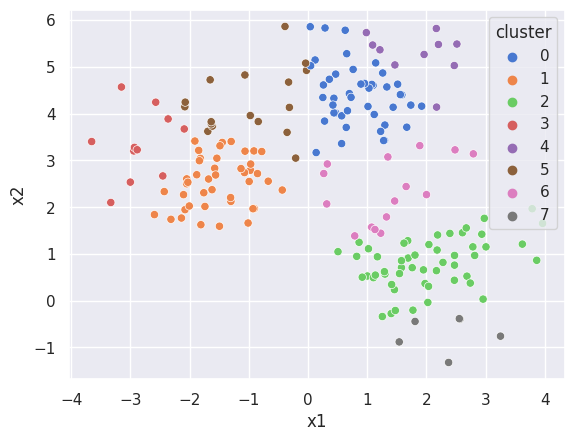

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
sns.scatterplot(
    x='x1',
    y='x2',
    hue='cluster',
    palette='muted',
    data=sample_data_df
)
plt.show()

In [6]:
# bandwidth 증가
meanshift = MeanShift(bandwidth=1.0)
cluster_labels = meanshift.fit_predict(X)
print("클러스터의 유형 : {}".format(np.unique(cluster_labels)))

클러스터의 유형 : [0 1 2]


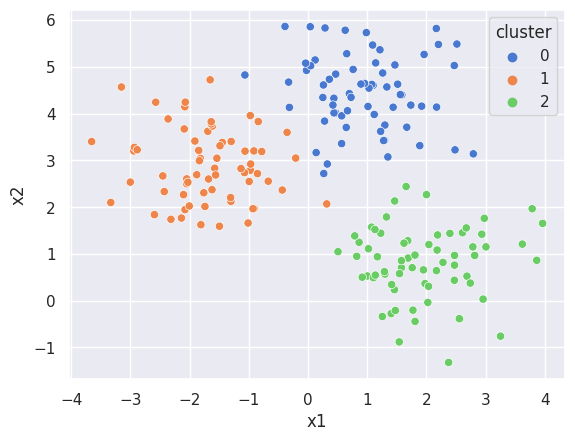

In [7]:
sample_data_df = pd.DataFrame(
    data=X,
    columns=["x1", "x2"]
)

sample_data_df['cluster'] = cluster_labels

sns.scatterplot(
    x='x1',
    y='x2',
    hue='cluster',
    palette='muted',
    data=sample_data_df
)
plt.show()

# 최적의 bandwidth 구해내기

In [8]:
from sklearn.cluster import estimate_bandwidth

best_bandwidth = estimate_bandwidth(X, quantile=0.25)
best_bandwidth

1.6889636737559222

In [9]:
meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)

print("클러스터의 유형 : {}".format(np.unique(cluster_labels)))

클러스터의 유형 : [0 1 2]


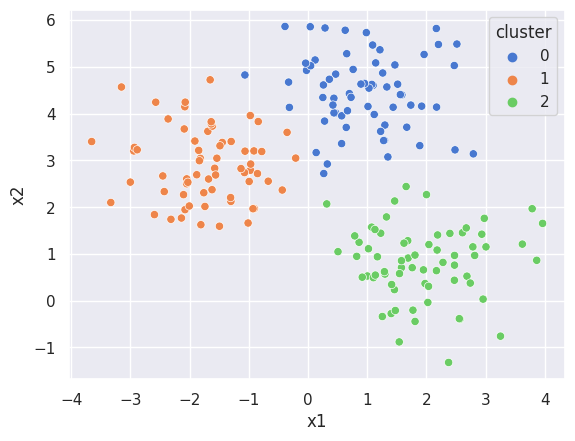

In [10]:
sample_data_df = pd.DataFrame(
    data=X,
    columns=["x1", "x2"]
)

sample_data_df['cluster'] = cluster_labels

sns.scatterplot(
    x='x1',
    y='x2',
    hue='cluster',
    palette='muted',
    data=sample_data_df
)
plt.show()

In [11]:
# centroid 구하기
meanshift.cluster_centers_

array([[ 0.90425412,  4.43969979],
       [-1.63547329,  2.84588284],
       [ 1.84011231,  0.83840976]])